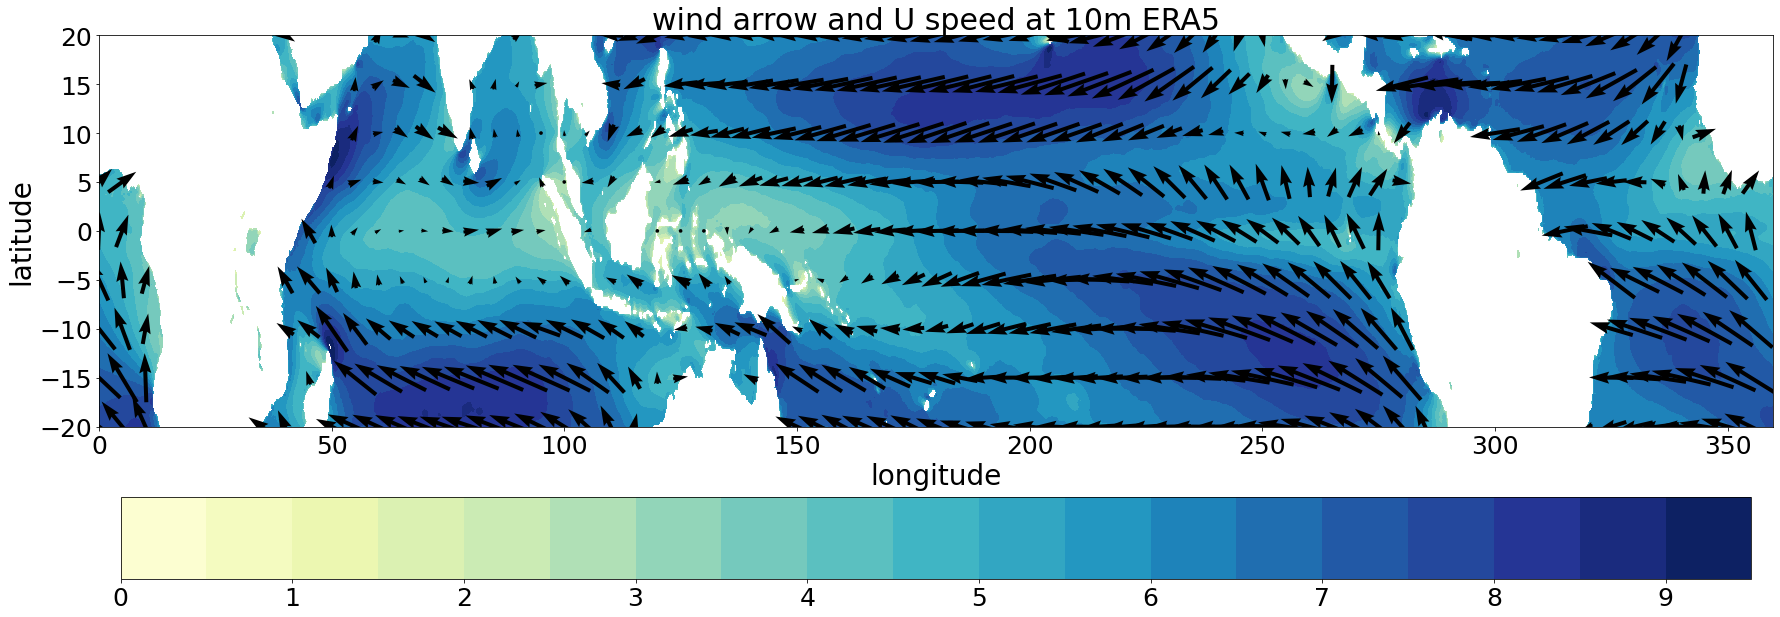

In [1]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import iris
import numpy as np
import sys
sys.path.append('/pf/b/b381639/Analysis')
import fxtian_function as fx
from iris.time import PartialDateTime
import datetime
import cf_units
import iris.coord_categorisation
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import xarray as ar



###############
# plot ERA5
###############

## Readin UVwsp


datain = iris.load_cube('/work/bb1153/b381639/ERA5/wsp10_daymean_2020_tropical_ocean_timmean.nc')
datain.data=datain.data
#datain.data=datain.data*-1
regyonx=datain[0,:,:]
ERA5=regyonx

datain = iris.load_cube('/work/bb1153/b381639/ERA5/u10_mon_2020_tropical_ocean_timmean.nc')
datain.data=datain.data
#datain.data=datain.data*-1
regyonx=datain[0,:,:]
uERA5=regyonx



datain = iris.load_cube('/work/bb1153/b381639/ERA5/v10_mon_2020_tropical_ocean_timmean.nc')
datain.data=datain.data
#datain.data=datain.data*-1
regyonx=datain[0,:,:]
vERA5=regyonx


######################
#plot a map lat vs Lon
########################
########
#(1) get x-axis and y axis
arr=ar.DataArray.from_iris(ERA5) # iris cube to xarray

latm=arr.latitude.data              # latm is x-axis
lonm=arr.longitude.data   # +180         # lonm is y-axis  
#arr = np.roll(arr, 720, axis = 3)
#print(arr[0,0,:].data)

arru=ar.DataArray.from_iris(uERA5) # iris cube to xarray
latu=arru.latitude.data              # latm is x-axis
lonu=arru.longitude.data   # +180         # lonm is y-axis  
#arru = np.roll(arru, 720, axis = 3)

arrv=ar.DataArray.from_iris(uERA5) # iris cube to xarray
latv=arrv.latitude.data              # latm is x-axis
lonv=arrv.longitude.data   # +180         # lonm is y-axis  
#arrv = np.roll(arrv, 720, axis = 3)

x=uERA5.coord('longitude').points
y=uERA5.coord('latitude').points



##################
#(2)set color bar and prepare fig size
#levels1=np.arange(15,35,1) # min and max of the field; dont use it if not sure
levels1=np.arange(0,10,0.5) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-.5,.5,0.05) # min and max of the field; dont use it if not sure
#cbar='ocean'
#cbar='seismic'
cbar='YlGnBu'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(lonm,latm,arr,levels=levels1,cmap = cbar)
#plt.contourf(lonm,latm,arrsqrt,cmap = cbar)
#plt.title('SST- ICON 5N-5S daily from 20/1/2020')



plt.title('wind arrow and U speed at 10m ERA5',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        
plt.quiver(x[::20],y[::20],uERA5[::20,::20].data,vERA5[::20,::20].data,pivot='middle',scale=200)
        
plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('latitude'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('U10_ERA5.eps',format='eps',dpi=1000)

In [2]:
def interpolate_x(cube,save=None):
    import iris
    import iris.coord_categorisation
    target_lon = iris.coords.DimCoord(np.linspace(0,360,720),standard_name='longitude',units='degrees')
    target_lat = iris.coords.DimCoord(np.linspace(-20,20,80),standard_name='latitude',units='degrees',circular=True)
    target_cube = iris.cube.Cube(np.zeros((80,720),np.float32),dim_coords_and_dims=[(target_lat,0),(target_lon,1)])
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    target_cube.coord('longitude').guess_bounds()
    target_cube.coord('latitude').guess_bounds()
    scheme = iris.analysis.AreaWeighted(mdtol=0)
    interp_cube = cube.regrid(target_cube,scheme)

    if save is not None:
        iris.save(interp_cube,save)
    return(interp_cube)

In [3]:
cube_era5=interpolate_x(ERA5)

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/iris/analysis/_area_weighted.py:496: RuntimeWarning: invalid value encountered in true_divide
  frac_masked = 1 - np.true_divide(unmasked_weights_sum, weights_sum)


/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/iris/fileformats/_nc_load_rules/helpers.py:645: UserWarning: Ignoring netCDF variable 'OCNFRAC' invalid units 'fraction'
  warnings.warn(msg)
/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/dask/array/core.py:1698: FutureWarning: The `numpy.column_stack` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


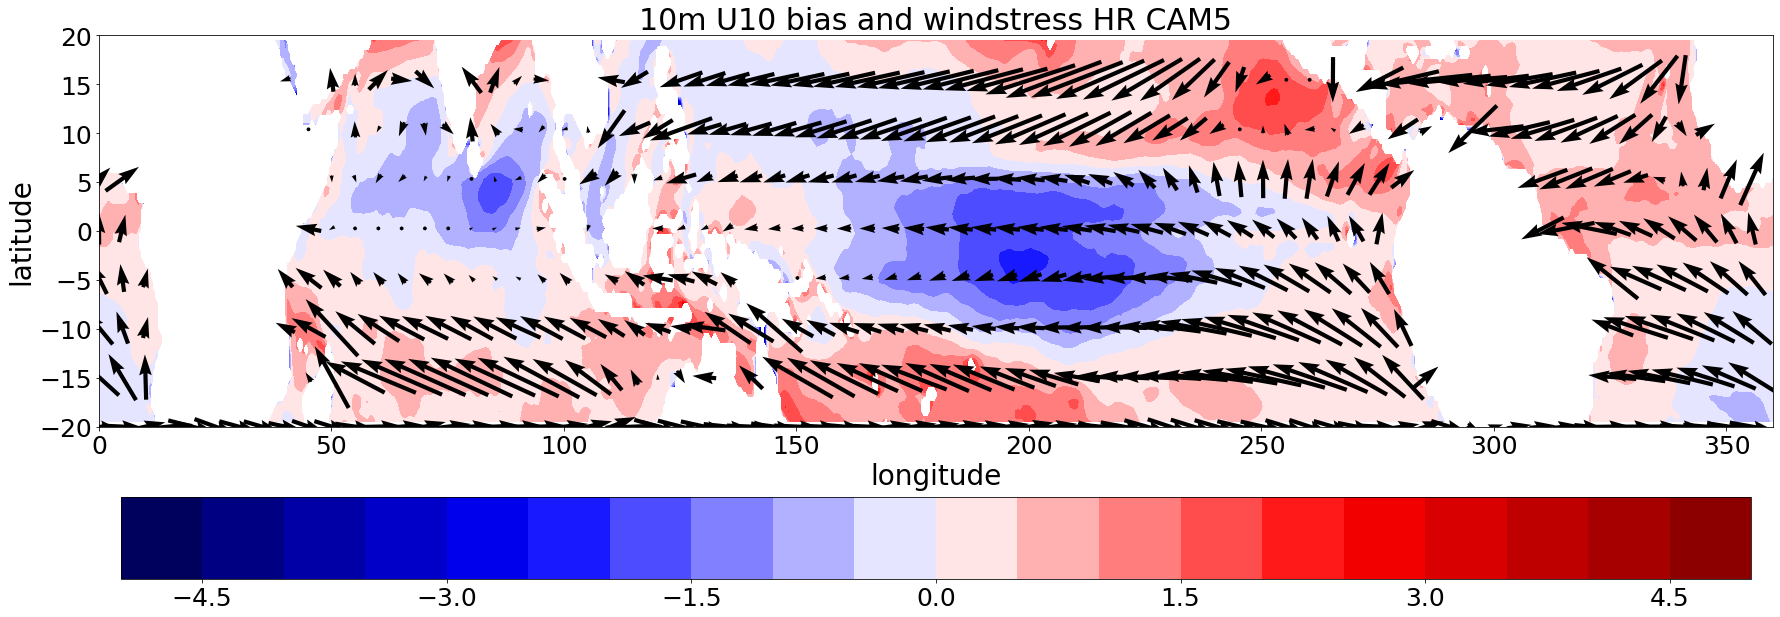

In [21]:
##########
#### HR CAM5 ######
#########
datain = iris.load_cube('/work/bb1153/b381639/NorESM/betzy_Hcam5_1.cam.h1.0010-01-01-00000_timmean.nc','U10')
datau = iris.load_cube('/work/bb1153/b381639/NorESM/betzy_Hcam5_1.cam.h1.0010-01-01-00000_timmean.nc','TAUX')
datav = iris.load_cube('/work/bb1153/b381639/NorESM/betzy_Hcam5_1.cam.h1.0010-01-01-00000_timmean.nc','TAUY')
datama = iris.load_cube('/work/bb1153/b381639/NorESM/OCNFRAC.nc','OCNFRAC')
#datain.data=datain.data*-1
#cubein=datain[0,:,:]

cubein=interpolate_x(datain[0,:,:])
cubeu=interpolate_x(datau[0,:,:])
cubev=interpolate_x(datav[0,:,:])
cubema=interpolate_x(datama[0,:,:])

arr=ar.DataArray.from_iris(cubein) # iris cube to xarray
arru=ar.DataArray.from_iris(cubeu)
arrv=ar.DataArray.from_iris(cubev)
arrma=ar.DataArray.from_iris(cubema)
arrera5=ar.DataArray.from_iris(cube_era5)

arr_B=arr-arrera5
arr_B.data=arr_B.where(arrma>0)
arru.data=arru.where(arrma>0)
arrv.data=arrv.where(arrma>0)

lon_min = 0
lon_max = 360
lat_min = -20
lat_max = 20

desired_lon = slice(lon_min, lon_max)
desired_lat = slice(lat_min, lat_max)

# make standard dataset selection
arr_sel_ds = arr_B.sel(latitude=desired_lat, longitude=desired_lon)
arru_sel_ds = arru.sel(latitude=desired_lat, longitude=desired_lon)
arrv_sel_ds = arrv.sel(latitude=desired_lat, longitude=desired_lon)



x=arru_sel_ds.longitude.data
y=arru_sel_ds.latitude.data


##################
#(2)set color bar and prepare fig size
#levels1=np.arange(15,35,1) # min and max of the field; dont use it if not sure
levels1=np.arange(-5,5.5,0.5) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-.5,.5,0.05) # min and max of the field; dont use it if not sure
#cbar='ocean'
cbar='seismic'
#cbar='YlGnBu'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(arr_sel_ds.longitude,arr_sel_ds.latitude,arr_sel_ds,levels=levels1,cmap = cbar)
#
#plt.contourf(lonm,latm,dusqrt,cmap = cbar)

plt.title('10m U10 bias and windstress HR CAM5',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        
plt.quiver(x[::10],y[::10],arru_sel_ds[::10,::10].data*-1,arrv_sel_ds[::10,::10].data*-1,pivot='middle',scale=2)

plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('latitude'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('U10_bias_HR_CAM5_TAUXY.eps',format='eps',dpi=1000)

/sw/spack-levante/mambaforge-4.11.0-0-Linux-x86_64-sobz6z/lib/python3.9/site-packages/dask/array/core.py:1698: FutureWarning: The `numpy.column_stack` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


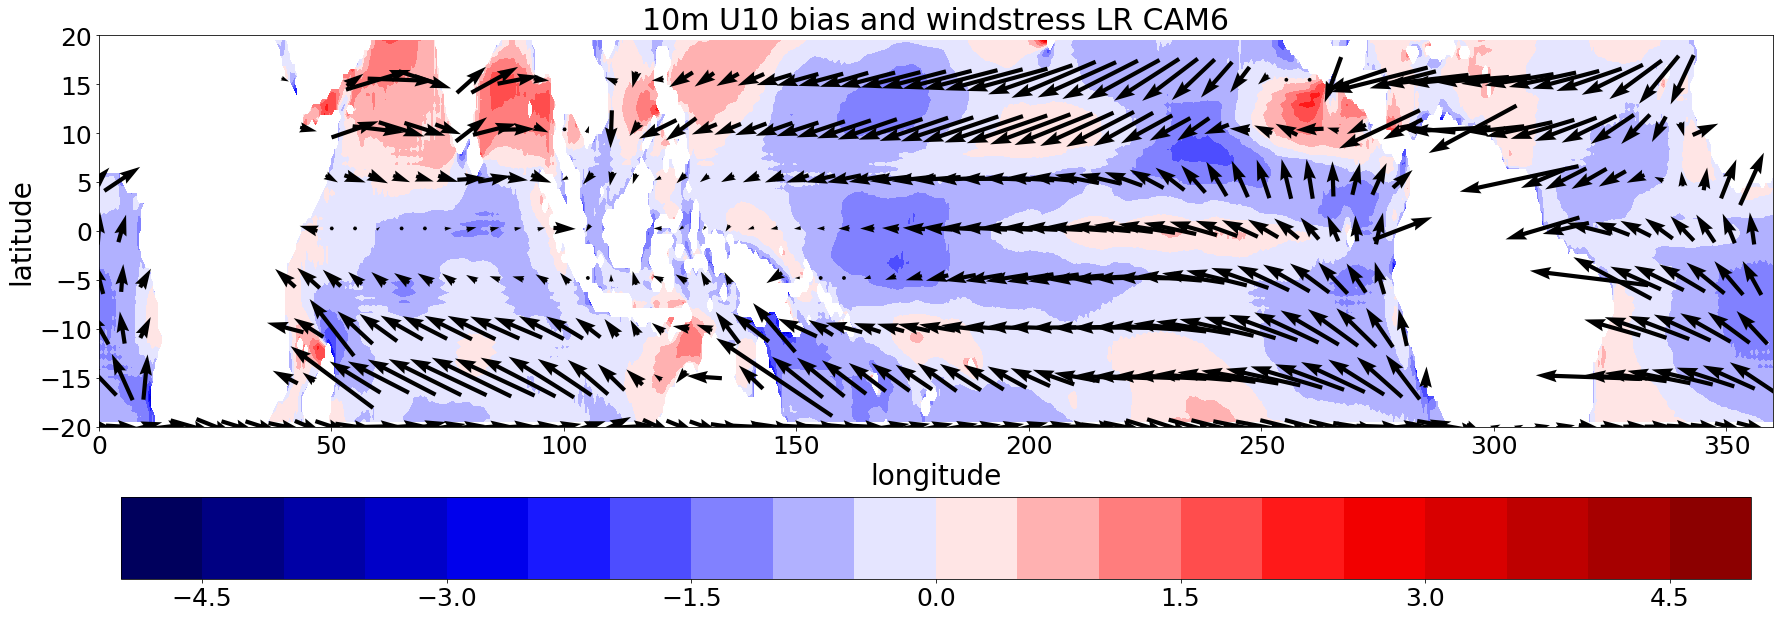

In [20]:
##########
#### LR CAM6 ####
###############

datain = iris.load_cube('/work/bb1153/b381639/NorESM/betzy_Lcam6_1.cam.h1.0010-01-01-00000_timmean.nc','U10')
datau = iris.load_cube('/work/bb1153/b381639/NorESM/betzy_Lcam6_1.cam.h1.0010-01-01-00000_timmean.nc','TAUX')
dataV = iris.load_cube('/work/bb1153/b381639/NorESM/betzy_Lcam6_1.cam.h1.0010-01-01-00000_timmean.nc','TAUY')
datama= iris.load_cube('/work/bb1153/b381639/NorESM/betzy_Lcam6_1.cam.h1.0010-01-01-00000_timmean.nc','SST')

cubein=interpolate_x(datain[0,:,:])
cubeu=interpolate_x(datau[0,:,:])
cubev=interpolate_x(datav[0,:,:])
cubema=interpolate_x(datama[0,:,:])

arr=ar.DataArray.from_iris(cubein) # iris cube to xarray
arru=ar.DataArray.from_iris(cubeu)
arrv=ar.DataArray.from_iris(cubev)
arrma=ar.DataArray.from_iris(cubema)
arr_B=arr-arrera5
arr_B.data=arr_B.where(arrma>0)
arru.data=arru.where(arrma>0)
arrv.data=arrv.where(arrma>0)

lon_min = 0
lon_max = 360
lat_min = -20
lat_max = 20

desired_lon = slice(lon_min, lon_max)
desired_lat = slice(lat_min, lat_max)

# make standard dataset selection
arr_sel_ds = arr_B.sel(latitude=desired_lat, longitude=desired_lon)
arru_sel_ds = arru.sel(latitude=desired_lat, longitude=desired_lon)
arrv_sel_ds = arrv.sel(latitude=desired_lat, longitude=desired_lon)



x=arru_sel_ds.longitude.data
y=arru_sel_ds.latitude.data


##################
#(2)set color bar and prepare fig size
#levels1=np.arange(15,35,1) # min and max of the field; dont use it if not sure
levels1=np.arange(-5,5.5,0.5) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-.5,.5,0.05) # min and max of the field; dont use it if not sure
#cbar='ocean'
cbar='seismic'
#cbar='YlGnBu'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(arr_sel_ds.longitude,arr_sel_ds.latitude,arr_sel_ds,levels=levels1,cmap = cbar)
#
#plt.contourf(lonm,latm,dusqrt,cmap = cbar)

plt.title('10m U10 bias and windstress LR CAM6',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        
plt.quiver(x[::10],y[::10],arru_sel_ds[::10,::10].data*-1,arrv_sel_ds[::10,::10].data*-1,pivot='middle',scale=2)

plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('latitude'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('U10_bias_LR_CAM6_TAUXY.eps',format='eps',dpi=1000)

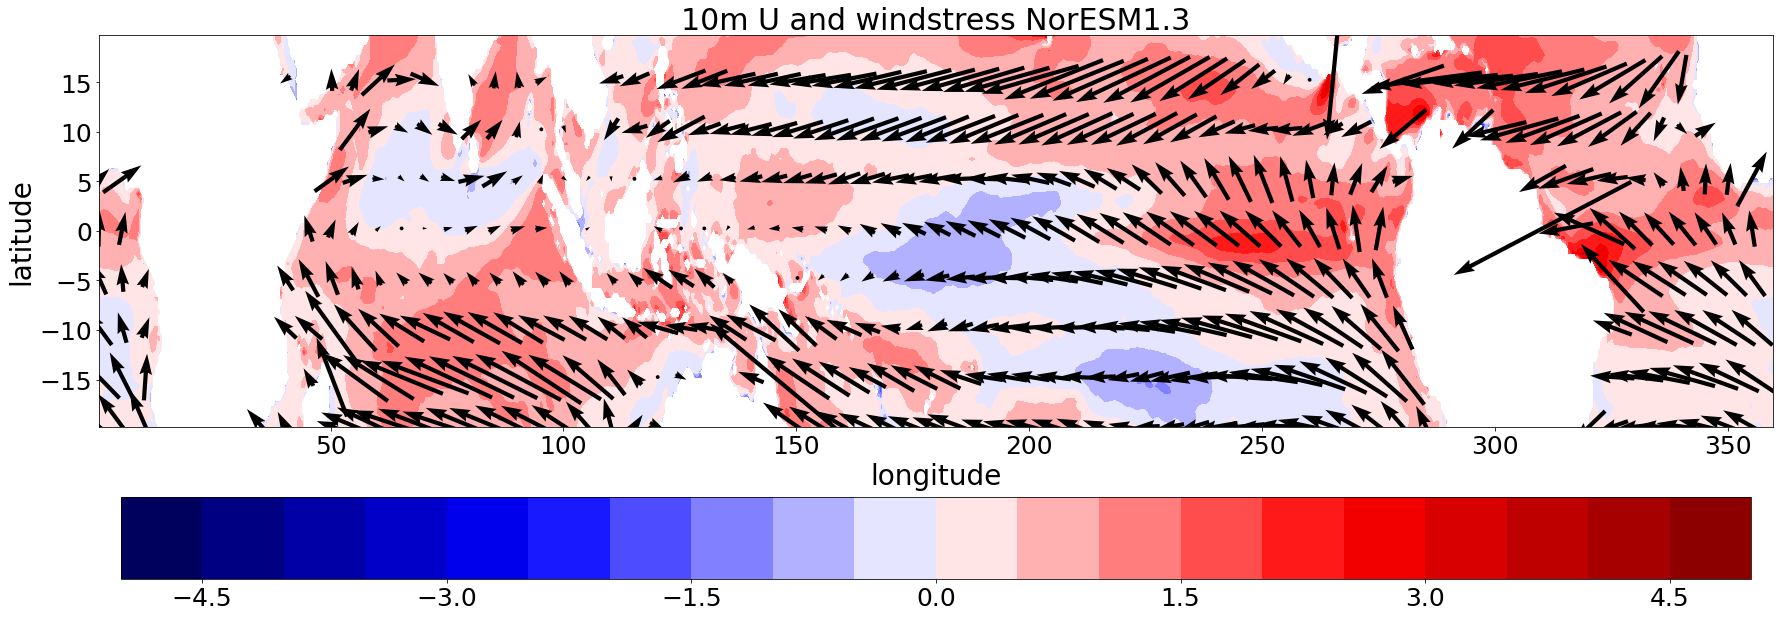

In [6]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import iris
import numpy as np
import sys
sys.path.append('/pf/b/b381639/Analysis')
import fxtian_function as fx
from iris.time import PartialDateTime
import datetime
import cf_units
import iris.coord_categorisation
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import xarray as ar



###############
# plot NorESM
###############

## Readin UVwsp
df=ar.open_dataset('/work/bb1153/b381639/NorESM/U10_150_tropical_ocean_timmean_bias.nc')
#df.coords['longitude'] = np.where(df.coords['longitude']<0,df.coords['longitude']+360,df.coords['longitude'])
#df = df.sortby(df.longitude)

latm=df.latitude.data              # latm is x-axis
lonm=df.longitude.data   # +180         # lonm is y-axis 

du=ar.open_dataset('/work/bb1153/b381639/NorESM/TAUX_150_tropical_ocean_timmean.nc')
dv=ar.open_dataset('/work/bb1153/b381639/NorESM/TAUY_150_tropical_ocean_timmean.nc')
#dv.coords['longitude'] = np.where(dv.coords['longitude']<0,dv.coords['longitude']+360,dv.coords['longitude'])
#dv = dv.sortby(dv.longitude)


x=du.longitude.data
y=du.latitude.data


##################
#(2)set color bar and prepare fig size
#levels1=np.arange(15,35,1) # min and max of the field; dont use it if not sure
levels1=np.arange(-5,5.5,0.5) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-.5,.5,0.05) # min and max of the field; dont use it if not sure
#cbar='ocean'
cbar='seismic'
#cbar='YlGnBu'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(lonm,latm,df.U10[0,:,:],levels=levels1,cmap = cbar)
#
#plt.contourf(lonm,latm,dusqrt,cmap = cbar)

plt.title('10m U and windstress NorESM1.3',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        
plt.quiver(x[::10],y[::10],du.TAUX[0,::10,::10].data*-1,dv.TAUY[0,::10,::10].data*-1,pivot='middle',scale=2)

plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('latitude'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('U10_bias_NorESM1.3_TAUXY.eps',format='eps',dpi=1000)

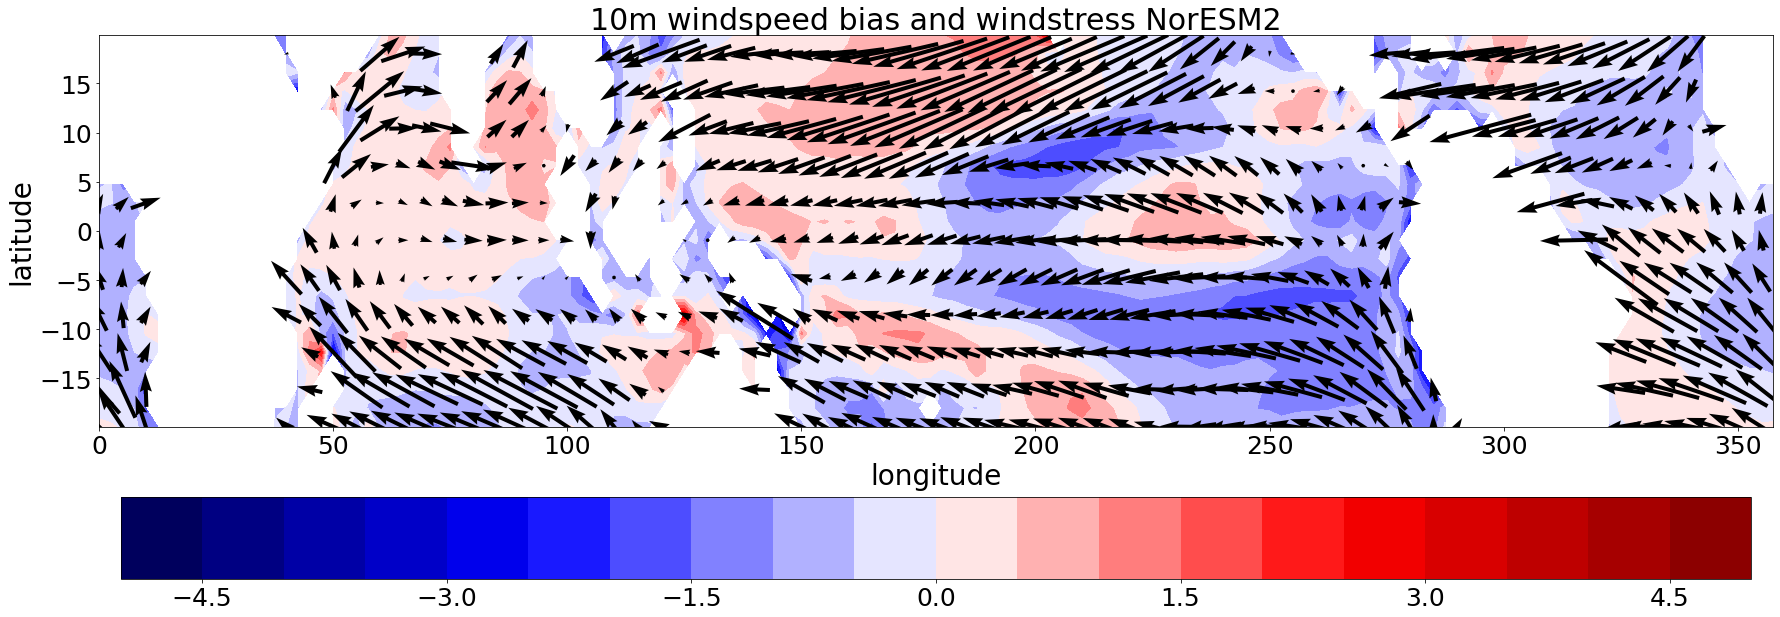

In [7]:
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import iris
import numpy as np
import sys
sys.path.append('/pf/b/b381639/Analysis')
import fxtian_function as fx
from iris.time import PartialDateTime
import datetime
import cf_units
import iris.coord_categorisation
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import xarray as ar



###############
# plot NorESM2
###############

## Readin UVwsp
df=ar.open_dataset('/work/bb1153/b381639/NorESM2/sfcWind_day_NorESM2-LM_historical_r3i1p1f1_gn_2010_tropical_ocean_timmean_bias.nc')


latm=df.lat.data              # latm is x-axis
lonm=df.lon.data   # +180         # lonm is y-axis 

du=ar.open_dataset('/work/bb1153/b381639/NorESM2/tauu_Amon_NorESM2-LM_historical_r3i1p1f1_gn_2010_tropical_ocean_timmean.nc')


dv=ar.open_dataset('/work/bb1153/b381639/NorESM2/tauv_Amon_NorESM2-LM_historical_r3i1p1f1_gn_2010_tropical_ocean_timmean.nc')



x=du.lon.data
y=du.lat.data


##################
#(2)set color bar and prepare fig size
#levels1=np.arange(15,35,1) # min and max of the field; dont use it if not sure
levels1=np.arange(-5,5.5,0.5) # min and max of the field; dont use it if not sure
#cbar='winter'
#levels1=np.arange(-.5,.5,0.05) # min and max of the field; dont use it if not sure
#cbar='ocean'
cbar='seismic'
#cbar='YlGnBu'
plt.figure(figsize=(30,10))

########
#plot the figure
plt.contourf(lonm,latm,df.sfcWind[0,:,:],levels=levels1,cmap = cbar)


plt.title('10m windspeed bias and windstress NorESM2',fontsize=30)
cbar=plt.colorbar(orientation='horizontal', pad=0.13)
cbar.ax.tick_params(labelsize = 25)
        
plt.quiver(x[::2],y[::2],du.tauu[0,::2,::2].data,dv.tauv[0,::2,::2].data,pivot='middle',scale=2)

plt.xlabel(('longitude'), fontsize=28)
plt.ylabel(('latitude'), fontsize=28)
plt.xticks(fontsize=25)#, rotation=90)
plt.yticks(fontsize=25)#, rotation=90)

#####save figure
plt.savefig('wsp10_bias_NorESM2_TAUXY.eps',format='eps',dpi=1000)


